In [225]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import quad
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from scipy.integrate import solve_bvp
from scipy import signal
from scipy import constants
from sympy import *

In [226]:
# choosing values

L = 0.1 # L = 10 [cm]
mu_0 = constants.mu_0
omega = 10**10 # 10[GHz]
Z_L = 1e5
eps_0 = constants.epsilon_0

In [227]:
# Desired Gamma
def Gamma(z):
    return 0.5*np.exp(-10*z)

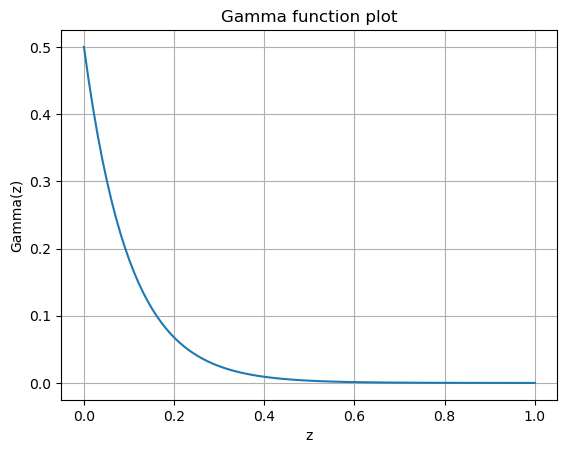

In [228]:
z_vals = np.linspace(0, 1, 100) # Generate 1000 equally spaced points between 0 and 0.000001

plt.plot(z_vals, Gamma(z_vals))
plt.xlabel('z')
plt.ylabel('Gamma(z)')
plt.title('Gamma function plot')
plt.grid()
plt.show()

# Spatial Reconstruction

### Derived Solution

Using the closed form expression and plotting the results

In [229]:
def dGamma_dz(z):
    return -50*np.exp(-1e2*z)

$$ a=-2\times\Gamma'(z)\times\frac1{1-\Gamma^2(z)} $$

In [230]:
# defining a from hese values
def a(z):
    return -2 * dGamma_dz(z) * 1/(1-(Gamma(z))**2)

$$ b(z)=4\omega\sqrt{\mu_0}\times\frac{\Gamma(z)}{1-\Gamma^2(z)} $$

In [231]:
def b(z):
    return 4*omega*np.sqrt(mu_0) * (Gamma(z)/(1-(Gamma(z))**2))

$$I(z)=e^{-\int_L^z a(z)}$$

Direct approach to find value of integral at each and every point

In [232]:
# convert a and b to arrays

a_r = [a(z_val) for z_val in z_vals]
b_r = [b(z_val) for z_val in z_vals]

In [233]:
I = [ np.exp(-quad(a, L, z_val)[0]) for z_val in z_vals ]

$$ D=\int_L^zI(z)\times b(z) $$

In [234]:
# We first find I(z)b(z) and we interpolate this function
d = [ (I[i]*b_r[i]) for i in range(0, 100) ]
d_interp = interp1d(np.linspace(0, 1, 100), d, kind='cubic')

In [235]:
D = [ quad(d_interp, L, z_val)[0] for z_val in z_vals ]

In [236]:
eps = [ ( (I[i])/( I[99]*(Z_L/np.sqrt(mu_0)) + 1j*D[i] ) )**2 for i in range(0, 100) ]

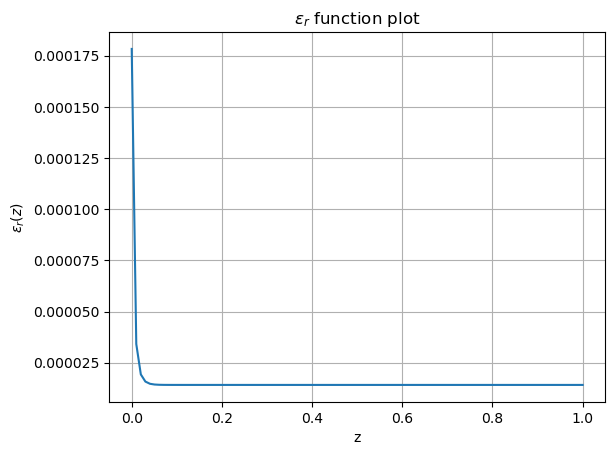

In [237]:
plt.plot(z_vals, [abs(val)/eps_0 for val in eps])
plt.xlabel('z')
plt.ylabel('$\epsilon_r(z)$')
plt.title('$\epsilon_r$ function plot')
plt.grid()
plt.show()

### ODE Solution

In [238]:

def a(z):
    return -2 * dGamma_dz(z) * 1/(1-(Gamma(z))**2)
def b(z):
    return 4*omega*np.sqrt(mu_0) * (Gamma(z)/(1-(Gamma(z))**2))

In [239]:
def d_xi_dz(z, xi):
    return -a(z)*xi-b(z)*xi**2;

In [246]:
req_xi = odeint(d_xi_dz, y0=np.sqrt(eps[0].real), t=z_vals, tfirst=True)
req_eps = np.multiply(req_xi, req_xi)

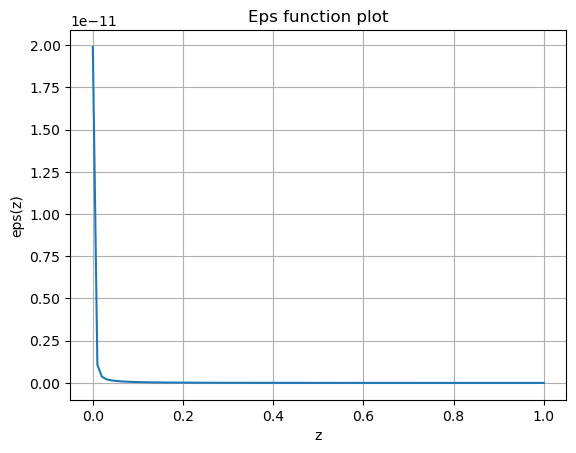

In [247]:
plt.plot(z_vals, [abs(val) for val in req_eps])
plt.xlabel('z')
plt.ylabel('eps(z)')
plt.title('Eps function plot')
plt.grid()
plt.show()

### Check

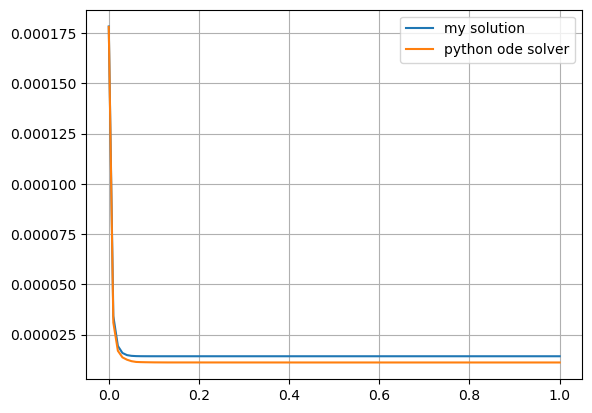

In [242]:
plt.plot(z_vals, [abs(val)/eps_0 for val in eps], label='my solution')
plt.plot(z_vals, [abs(val)/eps_0 for val in req_eps], label='python ode solver')
plt.legend()
plt.grid()
plt.show()

# Temporal Reconstruction

### Derived Solution and Python ODE solver

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import quad
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from scipy.integrate import solve_bvp
from scipy import constants
from sympy import *

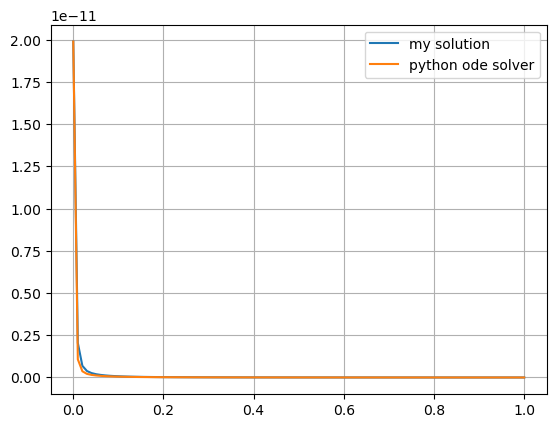

In [244]:

# Defining Gamma
def Gamma(t):
    return 0.5*np.exp(-(2*np.pi/omega)*t)
def dGamma_dt(t):
    return -0.5*(2*np.pi/omega)*np.exp(-(2*np.pi/omega)*t)
# defining a from hese values
def a(t):
    return -2 * dGamma_dz(t) * 1/(1-(Gamma(t))**2)
def b(t):
    return 4*omega*np.sqrt(mu_0) * (Gamma(t)/(1-(Gamma(t))**2))

# convert a and b to arrays
t_vals = np.linspace(0, 1, 100)

a_r = [a(t_val) for t_val in t_vals]
b_r = [b(t_val) for t_val in t_vals]
I = [ np.exp(-quad(a, 0, t_val)[0]) for t_val in t_vals ]

# We first find I(z)b(z) and we interpolate this function
d = [ (I[i]*b_r[i]) for i in range(0, 100) ]
d_interp = interp1d(np.linspace(0, 1, 100), d, kind='cubic')
D = [ quad(d_interp, 0, t_val)[0] for t_val in t_vals ]

dGamma_dt_r = [dGamma_dt(t_val) for t_val in t_vals]

xi_0 = (a_r[0]-2*dGamma_dt_r[0])/b_r[0]

eps = [ ( (I[i])/( I[0]*( 1/xi_0  ) + 1j*D[i] ) )**2 for i in range(0, 100) ]


# defining a from hese values
def a(t):
    return -2 * dGamma_dz(t) * 1/(1-(Gamma(t))**2)
def b(t):
    return 4*omega*np.sqrt(mu_0) * (Gamma(t)/(1-(Gamma(t))**2))

def d_xi_dt(t, xi):
    return -a(t)*xi-b(t)*xi**2;

req_xi = odeint(d_xi_dt, y0=xi_0, t=t_vals, tfirst=True)
req_eps = np.multiply(req_xi, req_xi)

plt.plot(t_vals, [abs(val) for val in eps], label='my solution')
plt.plot(t_vals, [abs(val) for val in req_eps], label='python ode solver')
plt.legend()
plt.grid()
plt.show()